<a href="https://colab.research.google.com/github/yuki-2000/Rocket/blob/main/RocketCEA%E3%81%A7%E3%81%AE%E8%A8%AD%E8%A8%88%E6%9C%80%E7%B5%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに

このプログラムは以下のサイトのプログラムを以下のサイトのプログラムをgooglecolab上で動かせるようにしたものです。

https://qiita.com/ina111/items/4e09711b9121db90dbaa

ソースコード
https://github.com/sonofeft/RocketCEA/blob/ce9d13ce7a7664d304770f92936c76e00c795ec7/rocketcea/cea_obj_w_units.py#L70

In [ ]:
!pip install rocketcea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.5 MB 2.2 MB/s 
  Created wheel for rocketcea: filename=rocketcea-1.1.29-cp37-cp37m-linux_x86_64.whl size=5287964 sha256=57ddc668781b1e951111f07b8ee9794e2c3b5ed4aea5ea24b47cac5ddb74ed38
  Stored in directory: /root/.cache/pip/wheels/fe/16/2d/c21181dc532026a95a94c59ecb344bd46b96c848e195102853
Successfully built rocketcea


In [ ]:
!python -c "from rocketcea.cea_obj import CEA_Obj; C=CEA_Obj(oxName='LOX', fuelName='LH2'); print(C.get_Isp())"

374.30361765576896


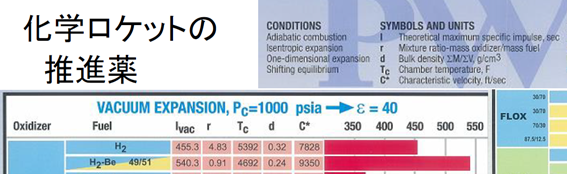

# プラット・アンド・ホイットニーの図と合うか確認

In [ ]:
from rocketcea.cea_obj import CEA_Obj 

ispObj = CEA_Obj( oxName='LOX', fuelName='LH2')
string = ispObj.get_full_cea_output( Pc=1000.0, MR=4.83, eps=40.0, short_output=1, pc_units='Psia', output='siunits')
#string = ispObj.get_full_cea_output( Pc=1000.0, MR=4.83, eps=40.0, frozen=1, frozenAtThroat=1, pc_units='Psia')  # 凍結流の場合はこういうオプションをつける

print(string)


 *******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  fuel H2(L)  H 2
  h,cal=-2154.0      t(k)=20.27       wt%=100.
  oxid O2(L)  O 2
  h,cal=-3102.      t(k)=90.18       wt%=100.
  
 prob case=RocketCEA,
  rocket equilibrium   p,Psia=1000.000000,  supar=40.000000,
  o/f=4.830000,
  
  
 output siunits  short  transport
 end






              THEORETICAL ROCKET PERFORMANCE ASSUMING EQUILIBRIUM

           COMPOSITION DURING EXPANSION FROM INFINITE AREA COMBUSTOR

 Pinj = 14503.8 PSIA
 CASE = RocketCEA,     

             REACTANT                    WT FRACTION      ENERGY      TEMP
                                          (SEE NOTE)     KJ/KG-MOL      K  
 FUEL      

# ツオルコフスキーの式

H2B固体ロケットブースタ

In [ ]:
import numpy as np

g = 9.81
M1_M2 = 531/(531-263.8)
Isp = 283.6


v = g*Isp* np.log(M1_M2)

print(v)



1910.6587250812565


必要Isp計算

In [ ]:
import numpy as np

g = 9.81
M1_M2 = 5.5

v = 6.9
#v = 7.3
eta = 0.96*0.94

Isp = v*1000/(g * np.log(M1_M2)*eta)

print(Isp)



457.21533017008306


真空と50kmでの比推力差
（中間報告の値を仮定）

In [ ]:
eps = 60
pa = 7.87*10**-4 * 0.1
#pa= 0.1
pc = 4

cstar = 2388

print(eps*pa/pc)
print(eps*pa*cstar/pc)

0.0011805000000000001
2.8190340000000003


# 剥離

In [ ]:
#高度50km

pe_min = 0.4*7.87*10**-4*0.1013 * 10**6

print(pe_min, "PaがPeの最小")
print(pe_min/(0.1013*10**6))


31.88924 PaがPeの最小
0.0003148


# 各条件によるIsp変化

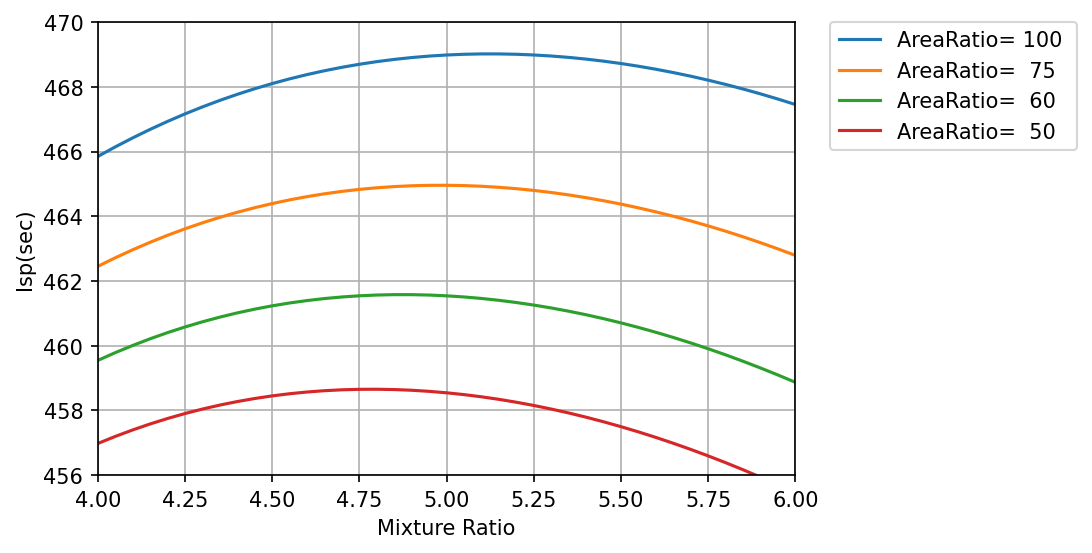

In [ ]:
from logging import PercentStyle
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj_w_units import CEA_Obj 

ceaObj = CEA_Obj(propName='', oxName='LOX', fuelName="LH2", temperature_units='K', pressure_units='MPa')
#Pcs = [2,3,4,5]
Pcs = [4]
#area_ratio = [250, 100,40.0]
area_ratio = [100,75, 60, 50]

plt.figure(dpi=150)

for eps in area_ratio:
  for Pc in Pcs:
      mrArr = np.arange(3, 7, 0.05)
      #ispArr = [ceaObj(Pc, MR, eps ) for MR in mrArr]
      ispArr = [ceaObj.get_IvacCstrTc(Pc, MR, eps )[0] for MR in mrArr]
      #ispArr = [ceaObj.estimate_Ambient_Isp(Pc, MR, eps, Pamb=0)[0] for MR in mrArr]
      plt.plot(mrArr, ispArr, label='AreaRatio=%4g '%eps)

#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.grid(True)
#plt.title(ceaObj.desc +  ', equilibrium'+ '@vacuum')
plt.xlim(4, 6)
plt.ylim(456, 470)
plt.xlabel('Mixture Ratio')
plt.ylabel('Isp(sec)')
plt.show()




# 燃焼室化学平衡

In [ ]:
from rocketcea.cea_obj import CEA_Obj 


Pc=580
MR=5.5
eps=60

ispObj = CEA_Obj( oxName='LOX', fuelName='LH2')
string = ispObj.get_full_cea_output(Pc=Pc, MR=MR, eps=eps, short_output=1, pc_units='psia', output='siunits')
#string = ispObj.get_full_cea_output( Pc=1000.0, MR=4.83, eps=40.0, frozen=1, frozenAtThroat=1, pc_units='Psia')  # 凍結流の場合はこういうオプションをつける

print(string)




IspVac, Cstar, Tc, MW, gamma = ispObj.get_IvacCstrTc_ChmMwGam(Pc=Pc, MR=MR, eps=eps)

print(' Pc(psia) AreaRatio  O/F   IspVac(sec)  Cstar(m/s)  Tc(degK)   MolWt    gamma')
print( '%5.1f %8.1f   %6.1f  %8.1f    %8.1f    %8.1f  %8.2f  %8.4f '%\
         (Pc, eps, MR, IspVac, Cstar*0.3048, Tc, MW, gamma))







 *******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  fuel H2(L)  H 2
  h,cal=-2154.0      t(k)=20.27       wt%=100.
  oxid O2(L)  O 2
  h,cal=-3102.      t(k)=90.18       wt%=100.
  
 prob case=RocketCEA,
  rocket equilibrium   p,psia=580.000000,  supar=60.000000,
  o/f=5.500000,
  
  
 output siunits  short  transport
 end






              THEORETICAL ROCKET PERFORMANCE ASSUMING EQUILIBRIUM

           COMPOSITION DURING EXPANSION FROM INFINITE AREA COMBUSTOR

 Pinj =   580.0 PSIA
 CASE = RocketCEA,     

             REACTANT                    WT FRACTION      ENERGY      TEMP
                                          (SEE NOTE)     KJ/KG-MOL      K  
 FUEL       

# 排気圧計算
gamma=1.2946 @排気位置

1.1828 @わからないが、上の行

1/600 MPaは高度約20km

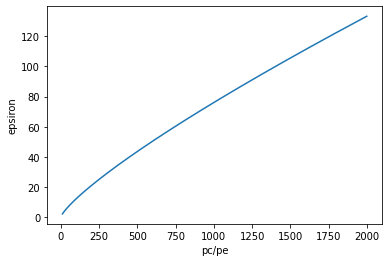

pe[MPa]= 0.005379396709171488
大気圧に対する比 0.05310362003130788


In [ ]:
from scipy import optimize
import numpy as np

# 膨張比　p20 ロケット推進工学(3-25) 3-35が普通、100km以上では40-100,400もあり
#ラバールノズルのことを考えた式
def get_expansion_ratio(k, pc, pe):
    a = 2/(k+1)
    a = a** (1/(k-1))
    b = pc/pe
    b = b**(1/k)
    c = (k+1)/(k-1)
    d = 1- (pe/pc)**((k-1)/k)
    ratio = a*b /np.sqrt(c*d)
    return ratio



x = np.linspace(10,2000,1000)
y = get_expansion_ratio(k=1.1828, pc=x, pe=1)


plt.xlabel("pc/pe")
plt.ylabel("epsiron")
plt.plot(x, y)
plt.show()


def funk(pe):
  k = 1.1828
  pc = 4
  target_eps = 60

  return target_eps - get_expansion_ratio(k, pc, pe)


pe = optimize.bisect(funk, 1*10**-3, 1)
print("pe[MPa]=",pe)
print("大気圧に対する比",pe/0.1013)





#手計算での特定高度でのIsp

なぜか大きくなってしまう。
原因不明

物性値の位置が違うのか。

In [ ]:
from rocketcea.cea_obj import CEA_Obj 

# 膨張比　p20 ロケット推進工学(3-25) 3-35が普通、100km以上では40-100,400もあり
#ラバールノズルのことを考えた式
def get_expansion_ratio(k, pc, pe):
    a = 2/(k+1)
    a = a** (1/(k-1))
    b = pc/pe
    b = b**(1/k)
    c = (k+1)/(k-1)
    d = 1- (pe/pc)**((k-1)/k)
    ratio = a*b /np.sqrt(c*d)
    return ratio





#p20 推力係数　p54(3-30) 123は
#pe: emmission, pc: combustion, pa: atomosphere eps:ε 
def get_CF(k,pe,pc,pa):
    a = 2*k*k /(k-1)
    index1 = (k+1)/(k-1)
    b = (2/(k+1))**index1
    index2 = (k-1)/k
    c = 1-(pe/pc)**index2
    d = (pe-pa)/pc
    
    eps = get_expansion_ratio(k, pc, pe)
    #print("expansion_ratio:", eps)
    
    cf = np.sqrt(a*b*c) + eps*d
    return cf




#p16 [m/s]
#Jとgの関係で1000をかけている
def get_c_star(k, M, Ro, Tc):
    a = 1000*Ro*Tc/M
    index = (k+1)/(k-1)
    b = k * (2/(k+1))**index
    
    c = np.sqrt(a) / np.sqrt(b)
    
    return c



#CEAの関数
Pc=580 #psia
MR=5.2
eps = 60

ispObj = CEA_Obj( oxName='LOX', fuelName='LH2')
IspVac, Cstar, Tc, MW, gamma = ceaObj.get_IvacCstrTc_ChmMwGam(Pc=Pc, MR=MR, eps=eps)
Cstar *= 0.3048
print("PythonCEAの関数による直接出力--------------------------------------------------------")
print(' Pc(psia) AreaRatio  O/F   IspVac(sec)  Cstar(m/s)  Tc(degK)   MolWt    gamma')
print( '%5.1f %8.1f   %6.1f  %8.1f    %8.1f    %8.1f  %8.2f  %8.4f '%\
         (Pc, eps, MR, IspVac, Cstar, Tc, MW, gamma))


#CEA結果から計算
print("PythonCEAの関数による直接出力の値から自分の式で計算-----------------------------------------")
Pc=4
Ro = Ro = 8.31451 #[J/molK] 一般気体定数
pe= 0.005379396709171488


Cstar = get_c_star(k=gamma, M=MW, Ro=Ro, Tc=Tc)
Cf = get_CF(k=gamma,pe=pe,pc=Pc,pa=0)
Isp =  Cf*Cstar/9.81

print("C*:", Cstar)
print("CF:",Cf)
print("Isp:",Isp)

print("--------------------------")

#print("参考(CEA内のIsp)",Cstar*1.8551/9.81)
print("参考ganmaのみ1.25に変更して後はCEAの出す値から自分の式で計算(CEAでの表示は　1.1488   1.1526   1.2802)")

k = 1.2
Cstar = get_c_star(k=k, M=MW, Ro=Ro, Tc=Tc)
Cf = get_CF(k=k,pe=pe,pc=Pc,pa=0)
Isp =  Cf*Cstar/9.81

print("C*:", Cstar)
print("CF:",Cf)
print("Isp:",Isp)

"""

*******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  fuel H2(L)  H 2
  h,cal=-2154.0      t(k)=20.27       wt%=100.
  oxid O2(L)  O 2
  h,cal=-3102.      t(k)=90.18       wt%=100.
  
 prob case=RocketCEA,
  rocket equilibrium   p,psia=580.000000,  supar=60.000000,
  o/f=5.200000,
  
  
 output siunits  short  transport
 end






              THEORETICAL ROCKET PERFORMANCE ASSUMING EQUILIBRIUM

           COMPOSITION DURING EXPANSION FROM INFINITE AREA COMBUSTOR

 Pinj =   580.0 PSIA
 CASE = RocketCEA,     

             REACTANT                    WT FRACTION      ENERGY      TEMP
                                          (SEE NOTE)     KJ/KG-MOL      K  
 FUEL        H2(L)                        1.0000000     -9012.336     20.270
 OXIDANT     O2(L)                        1.0000000    -12978.768     90.180

 O/F=    5.20000  %FUEL= 16.129032  R,EQ.RATIO= 1.526285  PHI,EQ.RATIO= 1.526285

                 CHAMBER   THROAT     EXIT
 Pinf/P            1.0000   1.7429   878.55
 P, BAR            39.989   22.944  0.04552
 T, K             3287.15  3085.16  1053.64
 RHO, KG/CU M    1.7714 0 1.0930 0 6.4939-3
 H, KJ/KG        -1061.26 -2271.05 -10581.3
 U, KJ/KG        -3318.71 -4370.27 -11282.2
 G, KJ/KG        -64922.8 -62208.5 -31051.1
 S, KJ/(KG)(K)    19.4277  19.4277  19.4277

 M, (1/n)          12.107   12.220   12.498
 (dLV/dLP)t      -1.01669 -1.01174 -1.00000
 (dLV/dLT)p        1.3099   1.2313   1.0000
 Cp, KJ/(KG)(K)    8.0585   7.1564   3.0390
 GAMMAs            1.1488   1.1526   1.2802
 SON VEL,M/SEC     1610.4   1555.5    947.3
 MACH NUMBER        0.000    1.000    4.606

 TRANSPORT PROPERTIES (GASES ONLY)
   CONDUCTIVITY IN UNITS OF MILLIWATTS/(CM)(K)

 VISC,MILLIPOISE  0.99066  0.94518  0.39525

  WITH EQUILIBRIUM REACTIONS

 Cp, KJ/(KG)(K)    8.0585   7.1564   3.0390
 CONDUCTIVITY     15.9841  13.4387   1.8737
 PRANDTL NUMBER    0.4995   0.5033   0.6410

  WITH FROZEN REACTIONS

 Cp, KJ/(KG)(K)    4.0674   4.0241   3.0390
 CONDUCTIVITY      5.8807   5.5200   1.8737
 PRANDTL NUMBER    0.6852   0.6890   0.6411

 PERFORMANCE PARAMETERS

 Ae/At                      1.0000   60.000
 CSTAR, M/SEC               2352.1   2352.1
 CF                         0.6613   1.8551
 Ivac, M/SEC                2905.0   4524.1
 Isp, M/SEC                 1555.5   4363.5


 MOLE FRACTIONS

 *H               0.03235  0.02466  0.00000
 HO2              0.00001  0.00000  0.00000
 *H2              0.33396  0.33530  0.34481
 H2O              0.60573  0.62131  0.65519
 *O               0.00136  0.00072  0.00000
 *OH              0.02563  0.01748  0.00000
 *O2              0.00096  0.00052  0.00000

  * THERMODYNAMIC PROPERTIES FITTED TO 20000.K

 NOTE. WEIGHT FRACTION OF FUEL IN TOTAL FUELS AND OF OXIDANT IN TOTAL OXIDANTS

"""

print("標準CEAでの結果-------------------------------------------------------------")
print(" T, K             3287.15  3085.16  1053.64")
print("GAMMAs            1.1488   1.1526   1.2802")
print(" M, (1/n)          12.107   12.220   12.498")
print("RHO, KG/CU M    1.7714 0 1.0930 0 6.4939-3")
print("C*:2352.1   2352.1")
print("CF:0.6613   1.8551")
print("Isp:296.1   461.17")


print("標準CEAでの結果の出口から自分の式でさらに計算------------------------------------------")

Pc=4
Ro = Ro = 8.31451 #[J/molK] 一般気体定数
pe= 0.005379396709171488

Cstar = get_c_star(k=1.2802, M= 12.498, Ro=Ro, Tc=3287.15)
Cf = get_CF(k=1.2802,pe=pe,pc=Pc,pa=0)
Isp =  Cf*Cstar/9.81
print("C*:", Cstar)
print("CF:",Cf)
print("Isp:",Isp)

PythonCEAの関数による直接出力--------------------------------------------------------
 Pc(psia) AreaRatio  O/F   IspVac(sec)  Cstar(m/s)  Tc(degK)   MolWt    gamma
580.0     60.0      5.2     462.9      2388.6      3557.2     12.43    1.1828 
PythonCEAの関数による直接出力の値から自分の式で計算-----------------------------------------
C*: 2390.470901707071
CF: 1.9374640739409101
Isp: 472.11534065836724
--------------------------
参考ganmaのみ1.25に変更して後はCEAの出す値から自分の式で計算(CEAでの表示は　1.1488   1.1526   1.2802)
C*: 2378.091228096853
CF: 1.911948997224066
Isp: 463.48513138298927
標準CEAでの結果-------------------------------------------------------------
 T, K             3287.15  3085.16  1053.64
GAMMAs            1.1488   1.1526   1.2802
 M, (1/n)          12.107   12.220   12.498
RHO, KG/CU M    1.7714 0 1.0930 0 6.4939-3
C*:2352.1   2352.1
CF:0.6613   1.8551
Isp:296.1   461.17
標準CEAでの結果の出口から自分の式でさらに計算------------------------------------------
C*: 2228.244773854294
CF: 1.8134356377100984
Isp: 411.90402471443997


# 推進剤流量

In [ ]:
F = 1000 * 10**3 #N
Isp = 460
g = 9.81

w = F/(g*Isp)

MR=5.5
wf = w * 1/(1+MR)
wo = w * MR/(1+MR)


print("推進剤流量[kg/s]",w)
print("燃料流量[kg/s]",wf)
print("酸化剤流量[kg/s]",wo)

roH2 = 3.5
Vf = wf/roH2
print("Vf[m^3/s]", Vf)
print("Awf[m^2] @9m/s", Vf/9)


推進剤流量[kg/s] 221.60173735762086
燃料流量[kg/s] 34.09257497809552
酸化剤流量[kg/s] 187.50916237952535
Vf[m^3/s] 9.740735708027291
Awf[m^2] @9m/s 1.082303967558588


# ノズル形状


In [ ]:
import numpy as np
cstar = 2331.2
w = 221.6
pc = 4*10**6
eps = 60

At = cstar * w /pc
Dt = np.sqrt(4*At/np.pi)



A2 = At*eps
D2 = np.sqrt(4*A2/np.pi)
print("スロート面積", At)
print("スロート直径", Dt)
print("スロート半径", Dt/2)
print("出口面積", A2)
print("出口直径", D2)
print("出口半径", D2/2)


#p43 30-40inch @LH2
Lstar = 40 * 25.4 /1000 #[m]
print("L*",Lstar)

Lstar=1
Vc = Lstar*At

print("Vc", Vc)


A1 = At *3 
D1 =  np.sqrt(4*A1/np.pi)

Lcy = Vc/(np.pi*Dt**2/4) - (3*3**0.5 -1)*Dt/(6*3**0.5)
Lcy /= 3
Ls = Dt * (3-3**0.5)/6



print("A1",A1)
print("D1",D1)

print("Lcy",Lcy)
print("30℃長さ", Ls)



a = 0.072 #正方形一辺
waterA = (np.pi/4)*((Dt + a*2)**2 - Dt**2)
print("冷却材流路面積[m^2]",waterA)


#正方形として、
m = a**2/(4*a)

print("正方形一辺[m]", a)
print("水力半径[m]",m)
print("水力直径[m]",4*m)

print("冷却本数", waterA/a**2)


スロート面積 0.12914847999999998
スロート直径 0.4055082636376702
スロート半径 0.2027541318188351
出口面積 7.748908799999999
出口直径 3.1410535036363667
出口半径 1.5705267518181834
L* 1.016
Vc 0.12914847999999998
A1 0.3874454399999999
D1 0.7023609155094799
Lcy 0.278755306347601
30℃長さ 0.08569397923392179
冷却材流路面積[m^2] 0.10800982462122162
正方形一辺[m] 0.072
水力半径[m] 0.018
水力直径[m] 0.072
冷却本数 20.835228514896148


In [ ]:
ro = 1.7714
w = 221.6
v1 = 130
A1 = w/(ro*v1)

print(A1)

print(A1/0.129)

0.9622983993538357
7.459677514370819


# 冷却

冷却通路径、本数の算出手順（SP-125 P109 Sample Calculation (4-4)参照）

① 燃焼ガス側の熱流量q （＝hg×(Taw–Ｔwg) の算出

② 燃焼室内壁熱伝導率、内壁厚から、Twc の算出

③ 冷却材平均温度Tcoを仮定し、hc（= q/(Twc-Tco)）を算出

④ システムで設定した冷却材流量WGと、上記式、および燃焼室内径（スロート径）
から、冷却管径、本数を算出する。


ロケット推進工学p89


物性計算に関するサイトを紹介しますので学生さんに展開をお願いします。
また，液体水素使う人は，「Parahydrogen」を選択するようにご指示ください。
よろしくお願いします。
https://webbook.nist.gov/chemistry/fluid/
 


 Bartz P86


 

In [ ]:


#p50

def sigma(Twg, Tc, k, Mx):
    a = Twg/Tc
    b = 1 + (k-1)*Mx**2 /2
    c = (0.5*a*b + 0.5)**0.68
    d = b**0.12
    
    sigm = 1/(c*d)
    return sigm

 

def hg(Cg, Dt, mu0, Cp0, Pr0, Pc, c_star, rc, At, Ax,    Twg, Tc, k, Mx):
    a = Cg/(Dt**0.2) #間違っていたので修正
    b = (mu0**0.2) * Cp0/ (Pr0 ** 0.6)
    c = (Pc/c_star) ** 0.8
    d = (Dt/rc)**0.1
    e = (At/Ax)**0.9
    sigm = sigma(Twg, Tc, k, Mx)
    
    hg = a*b*c*d*e*sigm
    return hg





#mu[Pa s]: 粘性係数   cp[J/(KgK)]: 比熱   k[W/(mK)]: 熱伝導率

def Prandtl_number(k,Cp,mu):
    return mu*Cp*k


def hc( G, d, Tco, Twc, k=1.55*10**-2,Cp=0.01,mu=1.73*10**-6):
    Pr = Prandtl_number(k,Cp,mu)
    a = 0.029*Cp*mu**0.2 /Pr**(2/3)
    b = G**0.8 / d** 0.2
    c = (Tco/Twc)**0.55
    return a*b*c

def hc_with_Pr( G, d, Tco, Twc,  Pr, Cp=0.01,mu=1.73*10**-6):
  a = 0.029*Cp*mu**0.2 /Pr**(2/3)
  b = G**0.8 / d** 0.2
  c = (Tco/Twc)**0.55
  return a*b*c


#Taw = 3557.2
#Taw = 3085.16
Taw = 3153.24
print("Taw", Taw)
#Taw = 3000
Twg = 600
print("Twg", Twg)

#曲率半径はスロート半径の1.5倍(燃焼器側)
rc = 3*0.406/4
print("rc", rc)

#スロートでの燃焼ガスの値を代入
#cpは本当はCp0=7.73*10**3だが、そうするとうまくいかないので勝手に変えている。
gas_hg = hg(Cg=0.026, Dt=0.406, mu0=9.7*10**-5, Cp0=7.73, Pr0=0.5093, Pc=4*10**6, c_star=2331.2, rc=rc, At=0.13, Ax=0.13,    Twg=Twg, Tc=Taw, k=1.1455, Mx=1)
print("gas_hg[W/m^2K]",gas_hg)

q = gas_hg * (Taw-Twg)
print("q[KW/m^2]",q/1000)

#k = 43.24 #p91
#t = 0.000445 #p91

#267 銅
k = 398 #W/mK
t = 0.002 #m

Twc = Twg - q*t/k

print("Twc",Twc)


#超臨界流体
cp = 14.578*10**3 #J/kgK
mu=1.35*10**-5 #Pas
k = 0.29 #W/mK
Pr = mu*cp/k
print("冷却材Pr",Pr)


Tco = 500 #仮置き
for i in range(10):
  #液体
  #h2hc = hc( G=221.6, d=0.05, Tco=Tco, Twc=Twc, k=1.55*10**-2,Cp=0.01*10**-3,mu=1.73*10**-6)
  #気体　電熱工学
  h2hc = hc_with_Pr( G=34/1.08, d=0.072, Tco=Tco, Twc=Twc, Pr =Pr, Cp=cp,mu=mu)
  #print("h2hc",h2hc)
  print("Tco diff =", Twc - q/h2hc  - Tco)
  Tco = Twc - q/h2hc

print("h2hc",h2hc)
print("Tco",Tco)





    

Taw 3153.24
Twg 600
rc 0.3045
gas_hg[W/m^2K] 31.686941186984868
q[KW/m^2] 80.90436571625723
Twc 599.5934453984107
冷却材Pr 0.6786310344827586
Tco diff = 42.05273482766813
Tco diff = 2.4997662784900285
Tco diff = 0.13910974207726667
Tco diff = 0.007712254691568887
Tco diff = 0.00042747866689296643
Tco diff = 2.3694224523751473e-05
Tco diff = 1.3133192169334507e-06
Tco diff = 7.279436431417707e-08
Tco diff = 4.0348595575778745e-09
Tco diff = 2.2362200979841873e-10
h2hc 1473.8378051771936
Tco 544.6997756661905


# ポンプ設計



wf 34.09257497809552
wo 187.50916237952535


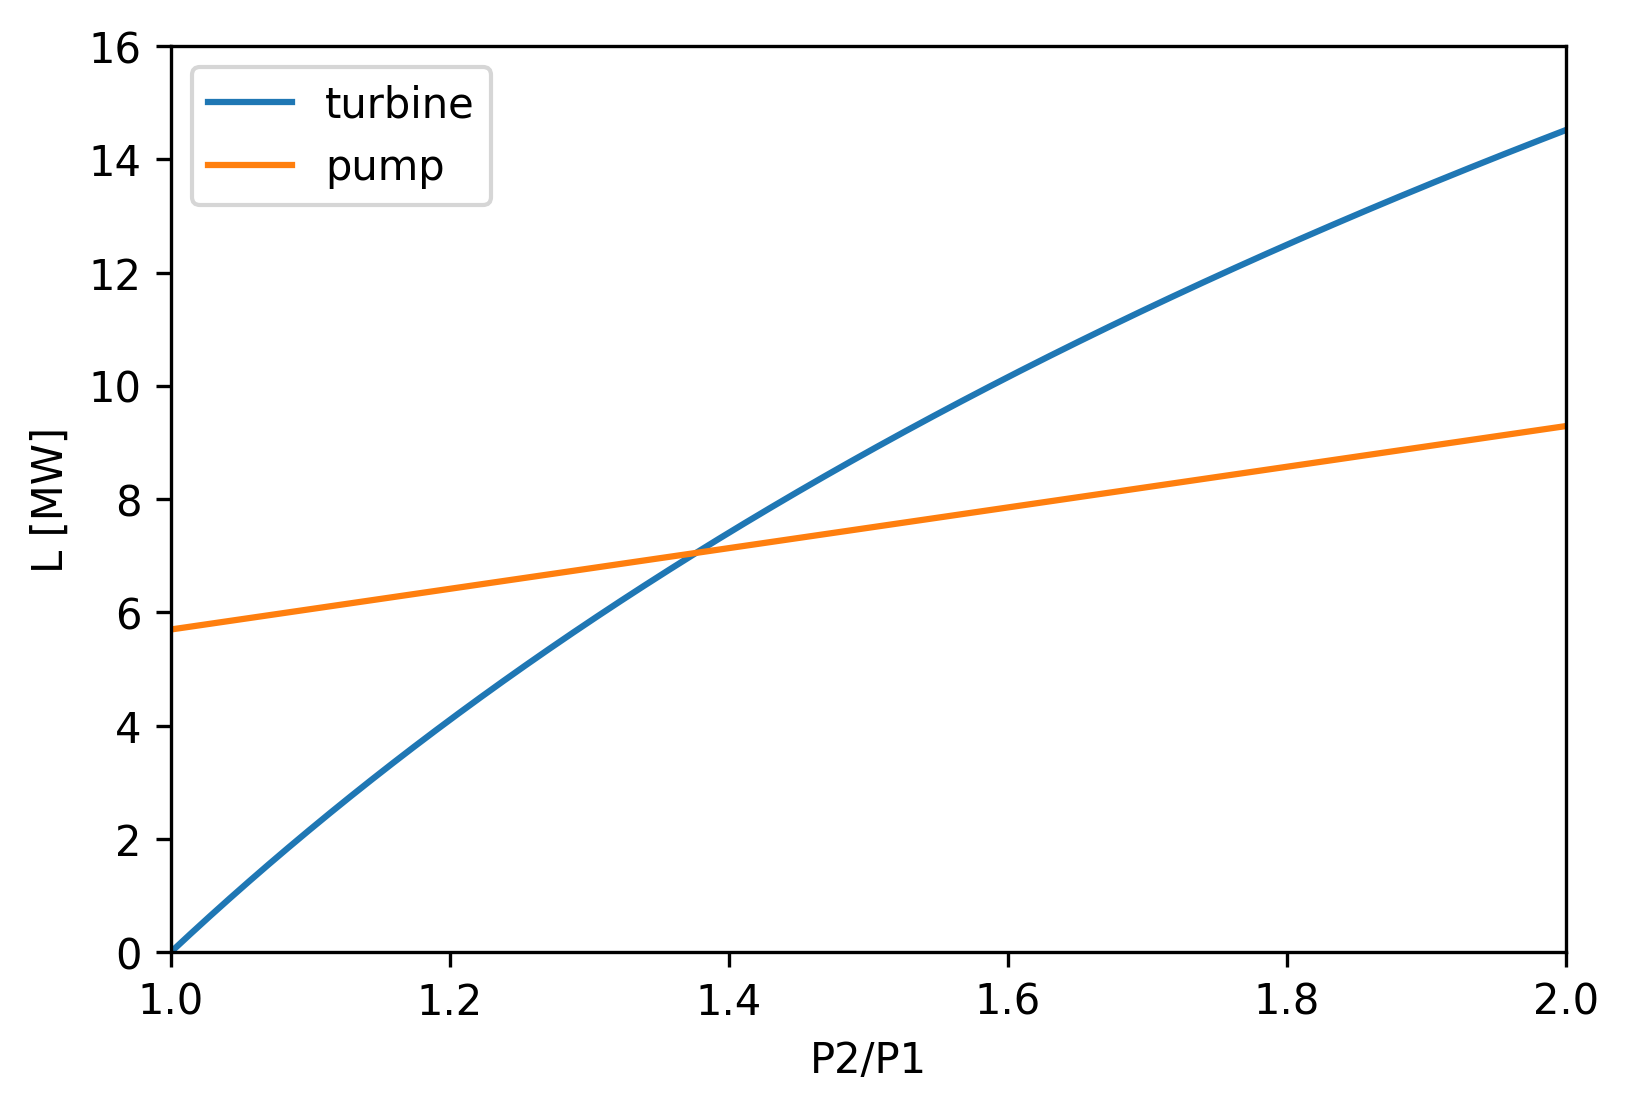

In [ ]:


#pump、タービン
Ro = 8.31451 #[J/molK] 一般気体定数
#wiki
ro_H2 = 70.8 #[kg/m^3] @20K
ro_O2 = 1140 #[kg/m^3] @90K
M_H2 = 2 #[g/mol]
M_O2 = 32 #[g/mol]

F = 1000 * 10**3 #N
g = 9.81
Isp = 460
w = F/(g*Isp)

MR = 5.5
wf = w * 1/(1+MR)
wo = w * MR/(1+MR)



print("wf",wf)
print("wo",wo)

#roは[kg/m^3]で与えること
def pump_power(Pd, Pi, wp, ro, etap):
    Lp = (Pd-Pi)*wp/(ro*etap)
    return Lp #[J/s]





#CpはMとkから計算するように変更
def turbine_power(P2_P1, etat, wt, M, Tg, k):
    R = 1000*Ro/M #[J/kgK] gからkgに変更のため1000倍
    Cp = R*k/(k-1) 
    index = (k-1)/k
    Lt = etat*wt*Cp*Tg*(1-P2_P1**index)
    return Lt #[J/s]
    
 


Pc = 4*10**6



x = np.linspace(1,2,1000)
y = turbine_power(P2_P1=1/x, etat=0.6, wt=wf*0.5, M=M_H2, Tg=543, k=1.4)

Pd = 1.3*Pc*x + 0.5*Pc

#p294
Hpump_power = pump_power(Pd=Pd, Pi=0.34*10**6, wp=wf, ro=ro_H2, etap=0.697)
Opump_power = pump_power(Pd=5.2*10**6, Pi=0.74*10**6, wp=wo, ro=ro_O2, etap=0.765)
sumpump_power = Hpump_power + Opump_power


#plt.hlines(y=sumpump_power, xmin=1, xmax=2)

#plt.xscale('log')
fig = plt.figure(dpi=300)
plt.xlabel("P2/P1")
plt.ylabel("L [MW]")
plt.plot(x, y/10**6,label='turbine' )
plt.plot(x, sumpump_power/10**6,label='pump' )
plt.xlim(1, 2)
plt.ylim(0, 16)
plt.legend()
plt.show()




# 特性曲線法

https://colab.research.google.com/drive/1quzJWAv81k5AyA25wfDZuS6LFXdkZlTf#scrollTo=-dThjOFJ5fbx


In [ ]:
from scipy import optimize

def outer_area(y0, Me, gamma):
    index = (gamma+1) / (2*(gamma-1))
    a = (gamma-1)*(Me**2) + 2
    a/=gamma+1
    
    ye = a**index
    ye*=y0/Me
    return ye

def diff(Me):
  gamma =1.1828
  y0 = 0.2052
  #ye = 1.5897
  ye = 0.25
  diffy = ye - outer_area(y0, Me, gamma)
  return diffy


M = optimize.bisect(diff, 1, 10)
print("M=",M)

M= 1.5122381404654561


In [ ]:
Mi = 0.585
Me = 3.1

gamma = 1.2
y0 =0.203

#適当に決めた
#長すぎるとどうやら最初の反射波が膨張部にあたってしまうみたいだ。
xa =0.05
#分割数
n =20

In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 8.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c896d8f4646b72329a673412089a42d6ae1b83ab1558f30f950137b9a6f02acb
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


円筒にするために、outer_area(y0, Me, gamma):
を変更

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

#p113
#rad
def nu(M):
    global gamma
    #mm = M*M
    #y = (np.sqrt((gamma+1)/(gamma-1)))  *   (np.arctan(np.sqrt(((gamma-1)*(M*M-1))/(gamma+1))))  -   (np.arctan(np.sqrt(M*M-1)))
    y = np.sqrt((gamma+1)/(gamma-1))
    y *=   np.arctan(  np.sqrt(  ((gamma-1)*(M*M-1)) / (gamma+1)  )  )
    y -=   np.arctan(  np.sqrt(M*M-1)  )
    #print(y)
    return y



#差をとって0に持っていくよう
def get_M_from_nu(input_M, goal_nu):
    return goal_nu - nu(input_M)




#断面積比

def outer_area(y0, Me, gamma):
    index = (gamma+1) / (2*(gamma-1))
    a = (gamma-1)*(Me**2) + 2
    a/=gamma+1
    
    ye = a**index
    ye*=y0/Me
    return ye#**0.5 #円筒とする。


def getM_from_y(Me,y):
    global y0,gamma
    return outer_area(y0, Me, gamma) - y



#(10.32)
#3次関数
#theta_maxのみdeg
def throat(y0, xa, theta_max, x):
    y = (x/xa)**2 -((x/xa)**3)/3
    y *= np.tan(np.deg2rad(theta_max))
    y *= xa
    y += y0
    
    return y



def get_throat_x_from_y(x,y):
    global y0, xa, theta_max
    return throat(y0, xa, theta_max, x) -y




#rad
#3次関数を直線近似するときの角度
def get_theta(xl, xr):
    global y0, xa, theta_max
    
    yl = throat(y0, xa, theta_max, xl)
    yr = throat(y0, xa, theta_max, xr)
    
    theta = np.arctan((yr-yl)/(xr-xl))
    #theta = np.rad2deg(theta)
    
    return theta


In [ ]:
#θmaxは#陽的に求まる
theta_max=np.rad2deg(nu(Me)/2)
theta_max_rad = np.deg2rad(theta_max)
print("θmax: " + str(theta_max)  + "deg, " + str(theta_max_rad) + "rad"  )


#出口の高さ
ye = outer_area(y0, Me, gamma)
print("出口の高さ: " + str(ye))
#入り口の高さ
yi = outer_area(y0, Mi, gamma)
print("入口の高さ: " + str(yi))
xi = optimize.bisect(get_throat_x_from_y, -10, 0, args=(yi))
print("入口の位置: " + str(xi))


θmax: 33.229149062669244deg, 0.5799580587795659rad
出口の高さ: 1.5743501899318681
入口の高さ: 0.2472050300964243
入口の位置: -0.05026928252959806


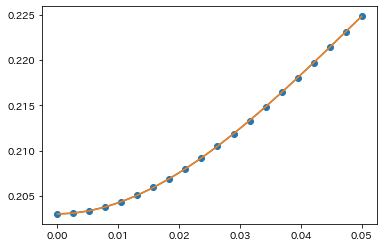

In [ ]:
#5番
#膨張部をn本で近似して壁角度を求める


#n本で区切ったらn+1この領域
x = np.linspace(0, xa, n)
x_smooth=np.linspace(0, xa, 10000)
#ノズル形状の図示
y_nozzle = throat(y0, xa, theta_max, x)
y_nozzle_smooth = throat(y0, xa, theta_max, x_smooth)

plt.plot(x, y_nozzle, '-o')
plt.plot(x_smooth, y_nozzle_smooth)
plt.show()



theta_area = [["nan" for j in range(n+2)] for i in range(n+2)]
#スローとではまっすぐ
theta_area[1][1] = 0
#壁面は直線近似、壁面での領域は流れの方向も平行
#(10.24)
for i in range(2,n+1):
    theta_area[i][1] = get_theta(xl = x[i-1], xr = x[i-2])

theta_area[n+1][1] = np.deg2rad(theta_max)



#6番
#nuとthetaの内部での値を求める
#(10.24)(10.25)
nu_area =  [["nan" for j in range(n+2)] for i in range(n+2)]
for i in range(1,n+1):
    for j in range(1,i+1):
        #(10.24)
        nu_area[i][j] = theta_area[i][1] + theta_area[j][1]
        theta_area[i][j] = theta_area[i][1] - theta_area[j][1]






#7番
#相殺部の設計
#図10.3より
#n+1分割したとして求めた角度
nu_area[n+1][1] = theta_area[n+1][1] + theta_area[1][1]



#教科書の番号のつけ方間違っている


for j in range(2, n+2):
    #(10.24)(10.25)
    nu_area[n+1][j] = theta_area[n+1][1] + theta_area[j][1]
    theta_area[n+1][j] = theta_area[n+1][1] - theta_area[j][1]
    
    #(10.3)(10.4)
    #j=nまで子か計算できない
    #nu_area[n+1][j] = (nu_area[n+1][j-1] + nu_area[n][j] + theta_area[n+1][j-1] - theta_area[n][j])/2
    #theta_area[n+1][j] = (nu_area[n+1][j-1] - nu_area[n][j] + theta_area[n+1][j-1] + theta_area[n][j])/2




In [ ]:

#8番
#交点を求めていく

#角度を求めるのに必要な状態を求める
M_area = [["nan" for j in range(n+2)] for i in range(n+2)]
#rad
beta_area = [["nan" for j in range(n+2)] for i in range(n+2)]


#p115,p178,180
#イクスパンションファン近似の二等分時にわざわざc_は求めなくてもよい。図10.3に従えばよし

for i in range(1,n+2):
    for j in range(1,i+1):
        #p115
        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html
        M_area[i][j] = optimize.bisect(get_M_from_nu, 1, 50, args=(nu_area[i][j]))
        #p180
        beta_area[i][j] = np.arcsin(1/M_area[i][j])





#p185に倣って番号をつける
#lineについてはrad、交点(i,j)に向かう線を[i][j]とした。        
       
expi_line_rad= [["nan" for j in range(n+2)] for i in range(n+2)]
expr_line_rad= [["nan" for j in range(n+2)] for i in range(n+2)]
cross_point_x= [["nan" for j in range(n+2)] for i in range(n+2)]
cross_point_y= [["nan" for j in range(n+2)] for i in range(n+2)]


for i in range(1,n+1):
    for j in range(1,i+1):
        expi_line_rad[i][j] = (theta_area[i][j] + theta_area[i+1][j] -beta_area[i][j] -beta_area[i+1][j])/2
        
for i in range(2,n+2):
    for j in range(1,i):
        expr_line_rad[i][j] = (theta_area[i][j] + theta_area[i][j+1] + beta_area[i][j] + beta_area[i][j+1])/2



for i in range(1,n+1):
    #壁側の座標
    cross_point_x[i][0]= x[i-1]
    cross_point_y[i][0]= throat(y0, xa, theta_max, cross_point_x[i][0])
    #中心の座標
    cross_point_y[i][i] = 0

for i in range(1,n+1):
    for j in range(1,i+1):
        if i == j:
            cross_point_x[i][j] = cross_point_x[i][j-1] - cross_point_y[i][j-1]/np.tan(expi_line_rad[i][j])
        else:
            numerator = cross_point_y[i][j-1] - cross_point_y[i-1][j] - cross_point_x[i][j-1]*np.tan(expi_line_rad[i][j]) + cross_point_x[i-1][j]*np.tan(expr_line_rad[i][j])
            denominator = np.tan(expr_line_rad[i][j]) - np.tan(expi_line_rad[i][j])
            cross_point_x[i][j] = numerator/denominator
            cross_point_y[i][j] = cross_point_y[i][j-1] + (cross_point_x[i][j]-cross_point_x[i][j-1])*np.tan(expi_line_rad[i][j])
            





cross_point_x[n+1][0] = xa
ya = throat(y0, xa, theta_max, xa)
cross_point_y[n+1][0] = ya

for j in range(1,n+1):
    numerator = cross_point_y[n+1][j-1] - cross_point_y[n][j] - cross_point_x[n+1][j-1]*np.tan(theta_area[n+1][j]) + cross_point_x[n][j]*np.tan(expr_line_rad[n+1][j])
    denominator = np.tan(expr_line_rad[n+1][j]) - np.tan(theta_area[n+1][j])
    cross_point_x[n+1][j] = numerator/denominator
    cross_point_y[n+1][j] = cross_point_y[n+1][j-1] + (cross_point_x[n+1][j]-cross_point_x[n+1][j-1])*np.tan(theta_area[n+1][j])



print("出口高さについて")
print("断面積から求めた結果: " + str(ye))
print("離散的に求めた結果:   " + str(cross_point_y[n+1][n]))


出口高さについて
断面積から求めた結果: 1.5743501899318681
離散的に求めた結果:   1.5655616992242267


図示の準備

ここ改変

In [ ]:


#交点が全部わかったので図示してみる

#expanshon fanのi番目の点を保存
ex_line = [[] for j in range(n+1)]
#無理やりそれぞれのラインの要素を追加

for i in range(1,n+1):
    for j in range(0,i+1):
        if cross_point_x[i][j] != "nan":
            ex_line[i].append([cross_point_x[i][j], cross_point_y[i][j]]) 

for i in range(1,n+1):
    for j in range(1,n+2):
        if cross_point_x[j][i] != "nan":
            ex_line[i].append([cross_point_x[j][i], cross_point_y[j][i]]) 
     
        
inner_expansion_fan = pd.DataFrame([0], columns=["x"]) 
for i in range(1,n+1):  
    label = "ex" + str(i)
    each_expansion_fan = pd.DataFrame(ex_line[i], columns=["x", label])
    inner_expansion_fan = inner_expansion_fan.append(each_expansion_fan)





#壁について

"""
#スロート以前
x_wall_minus = np.linspace(xi, 0, 100)
y_wall_minus = throat(y0, xa, theta_max, x_wall_minus)
"""




#チャンバー部をついか--------------------------


x_wall_minus = np.linspace(-0.086, xi, 100)
y_wall_minus = x_wall_minus * (-3**0.5) + y0


x_wall_chamber = np.linspace(-0.086-0.279, -0.086, 100)
y_wall_chamber = np.ones(100) * 0.351

x_wall_minus_all =np.append(x_wall_chamber, x_wall_minus)
y_wall_minus_all =np.append(y_wall_chamber, y_wall_minus)

x_wall_chamber = np.ones(100) * (-0.086-0.279)
y_wall_chamber = np.linspace(0, 0.351, 100)

x_wall_minus_all =np.append(x_wall_chamber, x_wall_minus_all)
y_wall_minus_all =np.append(y_wall_chamber, y_wall_minus_all)


wall_all = []
for i,j in zip(x_wall_minus_all, y_wall_minus_all):
    wall_all.append([i,j])



for i in range(1,n+1):
        if cross_point_x[i][0] != "nan":
            wall_all.append([cross_point_x[i][0], cross_point_y[i][0]]) 
            
for i in range(1,n+1):
        if cross_point_x[n+1][i] != "nan":
            wall_all.append([cross_point_x[n+1][i], cross_point_y[n+1][i]])        

#-------------------------------





wall = []
for i,j in zip(x_wall_minus, y_wall_minus):
    wall.append([i,j])



for i in range(1,n+1):
        if cross_point_x[i][0] != "nan":
            wall.append([cross_point_x[i][0], cross_point_y[i][0]]) 
            
for i in range(1,n+1):
        if cross_point_x[n+1][i] != "nan":
            wall.append([cross_point_x[n+1][i], cross_point_y[n+1][i]])        

inner_expansion_fan = inner_expansion_fan.append(pd.DataFrame(wall, columns=["x", "wall"]))
 




#中心軸について
xe = cross_point_x[n+1][n]
print("出口の位置: " + str(xe))


central_axis = []
central_axis.append([xi,0])
central_axis.append([xe,0])



inner_expansion_fan = inner_expansion_fan.append(pd.DataFrame(central_axis, columns=["x", "central_axis"]))


出口の位置: 6.318923461545417


In [ ]:
temp = np.array([inner_expansion_fan["x"],inner_expansion_fan["wall"]])


In [ ]:
print(wall_all[-7,0])
print(wall_all[-7,1])

5.12182935656052
1.539005066039538


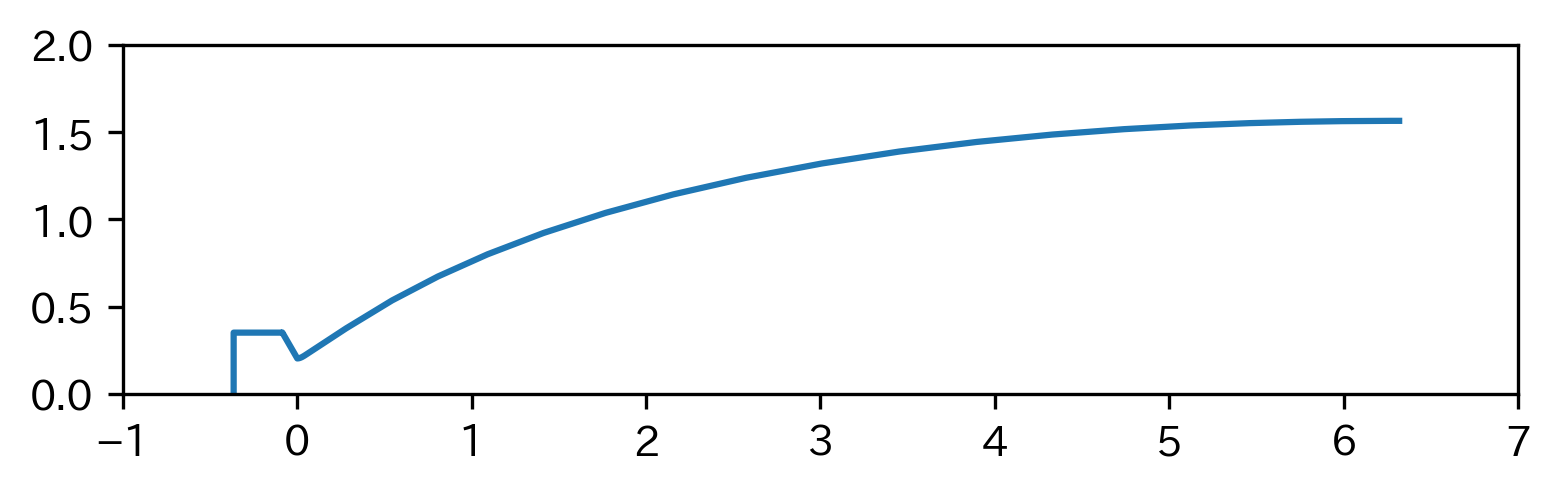

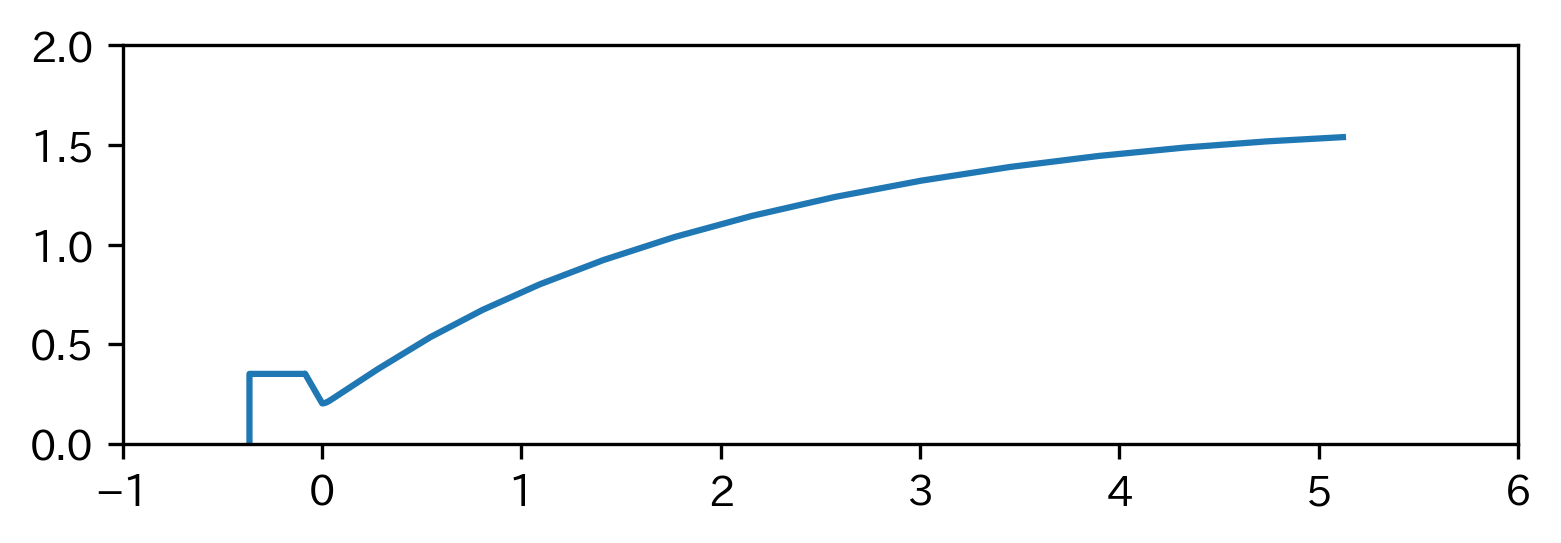

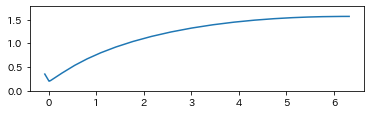

In [ ]:
wall_all = np.array(wall_all)
fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.set_ylim([0,2])
ax.set_xlim([-1,7])
ax.legend = False
ax.plot(wall_all[:,0], wall_all[:,1])


wall_all = np.array(wall_all)
fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.set_ylim([0,2])
ax.set_xlim([-1,6])
ax.legend = False
ax.plot(wall_all[:-6,0], wall_all[:-6,1])


temp = np.array([inner_expansion_fan["x"],inner_expansion_fan["wall"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.set_ylim([0,abs(ye)+0.2])
ax.legend = False
ax.plot(temp[0,:], temp[1,:])


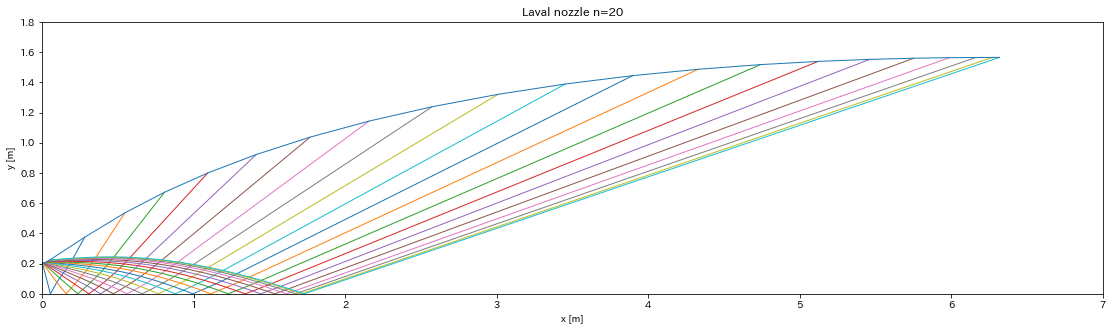

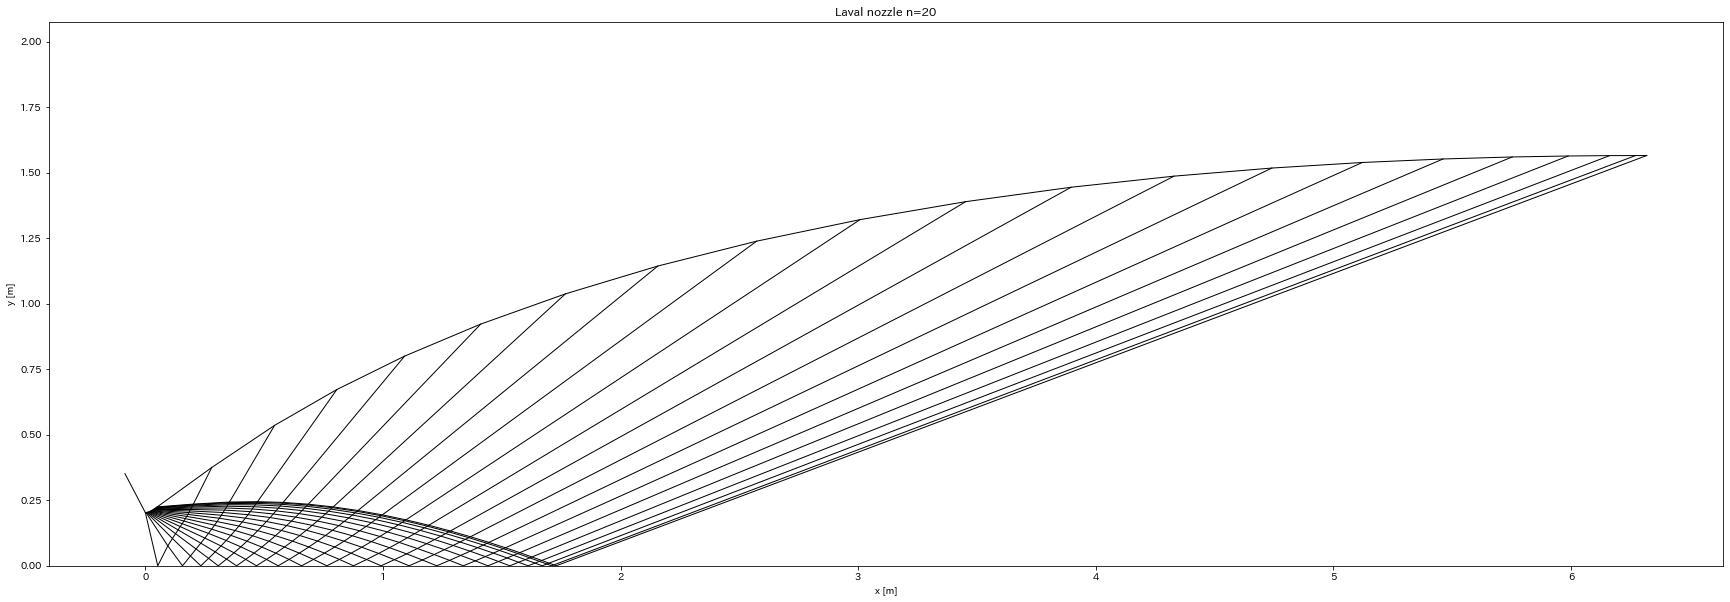

In [ ]:

#inner_expansion_fan.plot(x="x")      
#inner_expansion_fan.plot(x="x", legend = False,ylim=[0,abs(ye)+1])    

#img = inner_expansion_fan.plot(x="x", ylim=[0,6], figsize=(15, 10), legend = False,  xlabel="x [m]", ylabel="y [m]", title="Laval nozzle n={}".format(n),lw=1,style='o-').get_figure() 
img = inner_expansion_fan.plot(x="x", xlim=[0,7], ylim=[0,1.8], figsize=(19, 5), legend = False,  xlabel="x [m]", ylabel="y [m]", title="Laval nozzle n={}".format(n),lw=1).get_figure()         
img = inner_expansion_fan.plot(x="x", ylim=[0,abs(ye)+0.5], figsize=(30, 10), legend = False,  xlabel="x [m]", ylabel="y [m]", title="Laval nozzle n={}".format(n),lw=1, color ="k").get_figure()   

